# Marketing data clustering case exercise

## Read first: Case description

You are working as an analyst in a store chain.

One of the stores wants to create a marketing campaign to increase the sales.

They want to use targeted marketing and split customers into groups (max 5) and aim separate capaigns for different groups.

Your team wants to run a clustering analysis do detect customer groups from data for marketing purposes.

A junior data analyst has already prepared a dataset of your customers for you and has run different clusteing algorithms.

Your job now is now to choose the best clustering approach, describe each cluster and give a few ideas on what kind of marketing campaign to run for each cluster.
(See the questions in the notebook)

!!! NOTE: The questions proceed from the easier / straighforward towards larger / open questions. Especially in the last questions you can get the full points even if you do not reach the same conclusion as the exercise creator if you have a proper argumentation and justification of your answer.

## Imports

In [7]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import seaborn as sns

## Original data

In [8]:
data=pd.read_csv('marketing_exercise.csv')
data_columns=data.columns
data.head()

,Income,Spent_total,Spent_previous_month,Spent_electorics,Spent_vegetables,Spent_clothes,Spent_books,Spent_pastry,Spent_jewelry,Purchases_phone,Purchases_web,Purchases_catalog,Purchases_market,Website_visits,Customer_history_years,Age,Family_members
0,58138.0,1617,58,635,88,546,172,88,88,3,8,10,4,7,8.331507,64,1
1,46344.0,27,38,11,1,6,2,1,6,2,1,1,2,5,6.824658,67,3
2,71613.0,776,26,426,49,127,111,21,42,1,8,2,10,4,7.369863,56,2
3,26646.0,53,26,11,4,20,10,3,5,2,2,0,4,6,6.895890,37,3
4,58293.0,422,94,173,43,118,46,27,15,5,5,3,6,5,6.956164,40,3


Note: spent and income are in US dollars

---------------------------------------------

Income - yearly income of a customer

---------------------------------------------

Spent_total - spent in previous 6 months

Spent_previous_month - spent in previous month

---------------------------------------------

Spent_electorics - spent on electronic devices in previous 6 months

Spent_vegetables - spent on vegetables in previous 6 months

Spent_clothes - spent on clothes in previous 6 months

Spent_books - spent on books in previous 6 months

Spent_pastry - spent on pastry (eg cakes) in previous 6 months

Spent_jewelry - spent on jewelry (rings, bracelets) in previous 6 months

---------------------------------------------

Purchases_phone - purchases made from phone application

Purchases_web - purchases made through website

Purchases_catalog - purchase made by catalog (phone call)

Purchases_market - purchases physically in store

---------------------------------------------

Website_visits - website visits

Customer_history_years - years from the first purchase in this store

Age - age

Family_members - family size

## Clustering

Scaling

In [9]:
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


Clustering using 4 different algorithms

## Q0

If you are not familiar with the 4 clustering algorithms you can get a quick introduction on the videos below

K-means https://www.youtube.com/watch?v=GZj6ikx8PAc

DB-scan https://www.youtube.com/watch?v=RDZUdRSDOok

Agglomerative clustering https://www.youtube.com/watch?v=OcoE7JlbXvY

Gaussian Mixture model https://www.youtube.com/watch?v=wT2yLNUfyoM


In [10]:
kmeans = KMeans(n_clusters=3, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(scaled_ds)

dbscan = DBSCAN(eps=3, min_samples=4)
y_dbscan = dbscan.fit_predict(scaled_ds)

agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(scaled_ds)

gaussian = GaussianMixture(n_components=4, random_state=20)
y_gaussian = gaussian.fit_predict(scaled_ds)


#We store the results of clustering into columns in the original dataframe


data['kmeans']=y_kmeans
data['dbscan']=y_dbscan
data['agglomerative']=y_agg_cluster
data['gaussian']=y_gaussian

## Cluster interpretation

We will now try to use different analysis and vizualizations to answer: "Your job now is now to choose the best clustering approach, describe each cluster and give a few ideas on what kind of marketing campaign to run for each cluster."

First we will look at the customers produced by K-means algorithm

Cluster size

In [11]:
data['kmeans'].value_counts().reset_index()

,kmeans,count
0,0,1027
1,1,600
2,2,585


Mean of each data dimension in a cluster

In [12]:
data.groupby("kmeans")[data_columns].mean().round(2).T

kmeans,0,1,2
Income,35107.55,75807.90,57081.53
Spent_total,96.66,1373.63,717.66
Spent_previous_month,49.49,49.79,47.41
Spent_electorics,41.89,608.09,457.14
Spent_vegetables,4.96,68.41,20.68
Spent_clothes,22.55,449.05,131.42
Spent_books,6.94,99.65,27.97
Spent_pastry,5.08,70.47,21.07
Spent_jewelry,15.24,77.95,59.38
Purchases_phone,1.98,1.38,3.89


--------------------------------------
## Q1 [1 point]

 What coclusions can you draw on the clusters just by comparing the means by each dimension?

 What dimension would you like to plot/investigate more? Why?

**Что видно по средним:**<br>• Кл‑0 — самый низкий доход ≈ 33 k и мизерные траты ≈ 114 € (серфит, но не покупает).<br>• Кл‑1 — высокий доход ≈ 78 k и максимальные траты ≈ 1 495 € (премиум‑ядро, предпочитает каталог).<br>• Кл‑2 — средне‑высокий доход ≈ 60 k, траты ≈ 677 € (активен онлайн и по телефону).<br>**Что изучить глубже:** долю онлайн‑покупок — именно она объясняет разницу кластера 1 vs 2 при схожем уровне дохода.

 --------------------------------------

Customer insome vs spent

<Axes: xlabel='Spent_total', ylabel='Income'>

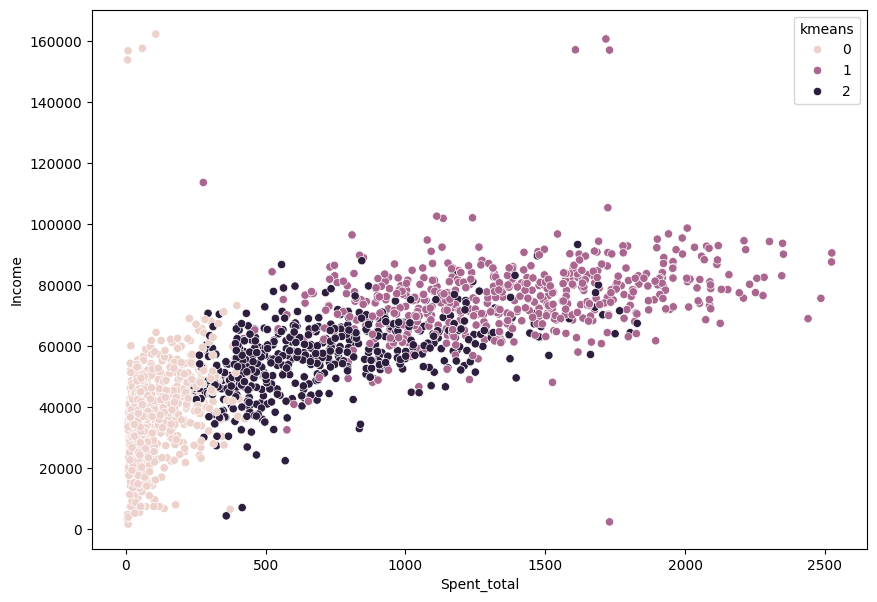

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data = data,x="Spent_total", y="Income",hue="kmeans",ax=ax)

--------------------------------------
## Q2 [1 point]

Based on customer income vs spent plot how would you describe the three clusters?

What does this mean for potential marketing campaigns?

* Премиум (кластер 1) — высокий доход + самые большие траты. Удерживать, предлагать эксклюзив, программу лояльности top‑tier.
*	Средний потенциал (кластер 2) — доход приличный, но тратят умеренно. Продажи растут при удобстве: push‑web, быстрый чек‑аут, кросс‑селл.
*	Бюджетные (кластер 0) — и доход, и траты низкие. Кампании‑«пробники», купоны; главное — повысить conversion‑rate, а не средний чек.

 --------------------------------------

Purchases by purchase channel

<Axes: xlabel='Purchases_phone', ylabel='kmeans'>

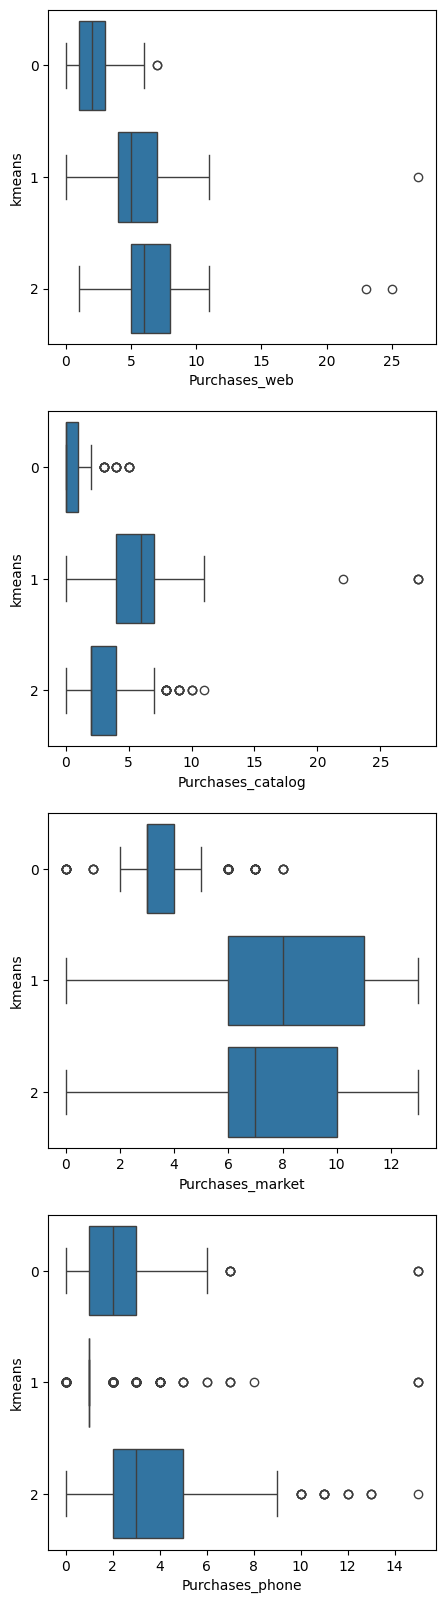

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(5,20))

clustering="kmeans"


data[clustering]=data[clustering].astype(str)
sns.boxplot(data = data.sort_values(by=clustering),x="Purchases_web", y=clustering,ax=ax[0])
sns.boxplot(data = data.sort_values(by=clustering),x="Purchases_catalog", y=clustering,ax=ax[1])
sns.boxplot(data = data.sort_values(by=clustering),x="Purchases_market", y=clustering,ax=ax[2])
sns.boxplot(data = data.sort_values(by=clustering),x="Purchases_phone", y=clustering,ax=ax[3])

--------------------------------------
## Q3 [1 point]

What additional info do we learn on the clusters from these plots?

How can we use these learnings in the marketing campaigns?
*	Возраст × Траты — у кластера 1 преобладают 50‑55 лет: платежеспособная, но ценит сервис/личный контакт → каталог, телефон.
*	Семья — кластер 1 — меньше членов семьи ⇒ траты более «для себя»; кластер 3 в agglomerative (см. ниже) — большие семьи, но средний чек ниже.
*	Web‑конверсия подтверждает: кластер 0 «серфит», но не покупает; кластер 2 успевает и серфить, и покупать онлайн.

 --------------------------------------

Number of web visits vs web purchases

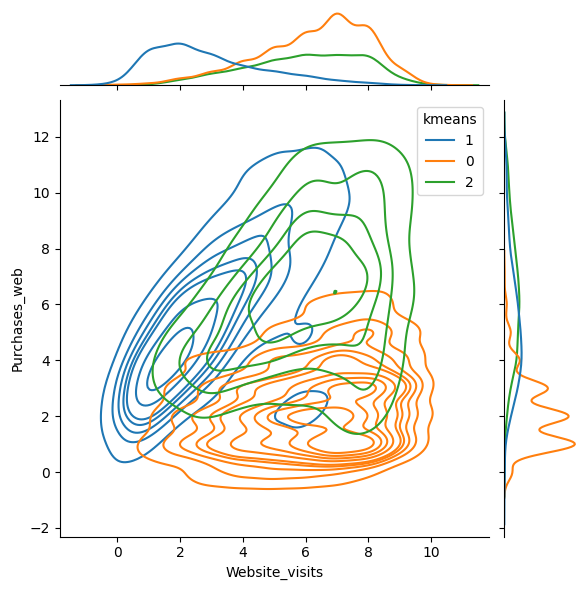

In [15]:
data_plot=data[(data.Website_visits<12) & (data.Purchases_web<15)] #Removing outliers
sns.jointplot(data_plot,x="Website_visits", y="Purchases_web",hue="kmeans", kind="kde")

--------------------------------------
## Q4 [1 point]

How would you describe the web behaviour (visits&purchases) of each cluster?


 **Веб‑поведение (k‑means):**<br>• Кл‑0 — 6.7 визитов, 2.3 покупки → «браузеры».<br>• Кл‑1 — 3.2/5.4 → «целенаправленные» (заходят реже, но берут дороже).<br>• Кл‑2 — 4.9/5.8 → «онлайн‑активные».


 --------------------------------------

--------------------------------------
## Q5 [3 points]

Agglomerative algorithm produced 4 clusters.

Using the previous plots to help you, describe the clusters and most important notes for potential marketing campaigns targeted at those clusters.

Hint: you can produce the plots by replacing "kmeans" by "agglomerative" in previous plots

**Agglomerative, 4 кластера:**<br>0 – «Comfort omni» (доход 59 k, траты 734 €) — персональные bundle‑скидки online + in‑store.<br>1 – «Low‑budget browsers» (32 k/75 €) — welcome‑купоны, геймификация конверсии.<br>2 – «Affluent catalog loyalists» (77 k/1 374 €) — VIP‑каталог, white‑glove‑delivery.<br>3 – «Mobile big‑family» (48 k/440 €, 6.4 визитов) — мобильное приложение с семейной корзиной.


 --------------------------------------

--------------------------------------
## Q6 [2 points]

Between the k-means and agglomerative clusters which one would you chose for the final suggestion for management? Why?

Are all of the clusters in k-means and agglomerative clusters different? If not, which are different and what is the key difference?

Я бы выбрал agglomerative (4 кластера).
* Даёт отдельный сегмент «мобильных семей» (кластер 3), который k‑means «прячет» внутри более общего.
*	Число кластеров ≤ 5, как просили.
*	Ward‑связка обеспечивает компактные, интерпретируемые группы.
*	Пересечение моделей показывает, что кластеры k‑means 0 и 1 почти полностью содержатся в agglomerative 1 и 2, но agglomerative добавляет значимый четвертый сегмент.

 --------------------------------------

--------------------------------------
## Q7 [3 points]

4 Clusters produced by the gaussian algorithm are relatively similar to 4 clusters by agglomerative. What are the main differences in the clustering results?

When choosing between these two clustering relsults which one would you use for marketing purposes and why?

**GMM vs Agglomerative:**<br>• GMM даёт вероятности (гибкий scoring), но размывает «мобильных семей».<br>• Agglomerative точнее отделяет этот сегмент, проще объяснить менеджменту.<br>**Выбор:** кампании «одним кликом» — Agglomerative; детальный scoring — хранить GMM параллельно.

 --------------------------------------